## Linear Regression Project on Predicting Delivery Time

In [224]:
#Importing Libraries

import pandas as pd
import numpy as np

### Reading the data

In [225]:
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\04. Simple Linear Regression\delivery_time.csv")

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Checkout the data & missing Values

In [227]:
#Check for missing values
df.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [228]:
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [229]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [230]:
#Correlation
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


## Exploratory Data Analysis

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

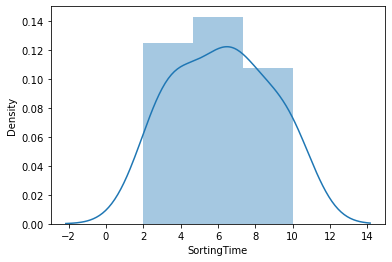

In [232]:
sns.distplot(df['SortingTime'])

C:\Users\aravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

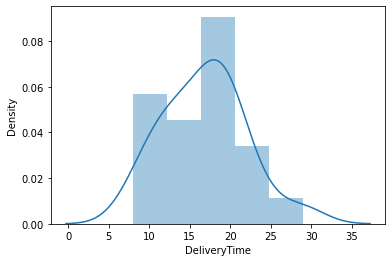

In [233]:
sns.distplot(df['DeliveryTime'])

### Checking Linearity with Scatter Plot

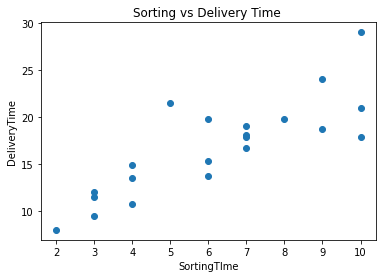

In [234]:
#Check Linearity

plt.scatter(df['SortingTime'],df['DeliveryTime'])
plt.xlabel("SortingTIme")
plt.ylabel("DeliveryTime")
plt.title("Sorting vs Delivery Time ")
plt.show()

<AxesSubplot:>

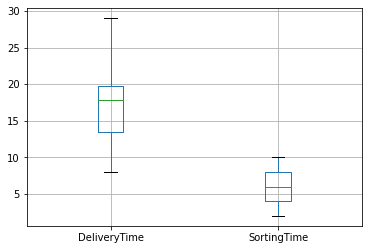

In [235]:
#Check for Outliers
df.boxplot()

### Checking the Normality with Q-Q Plot Representation

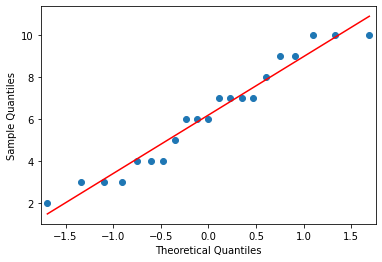

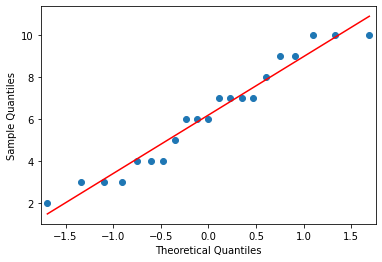

In [236]:
import statsmodels.api as sm
sm.qqplot(df['SortingTime'], line='r')


**From the above Q-Q plot we can observe that the line passing through few of the data points, most of the data points are across the line.**

**Lets apply different data transformation techniques to checkout the normality**

**Lets start with Logarithmic Trasnformation**

## Checking Normality with Log Transformation Q-Q Plot

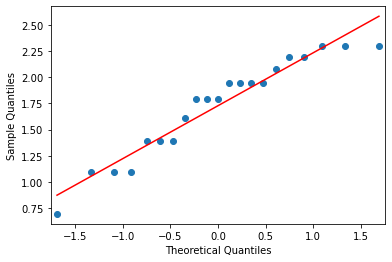

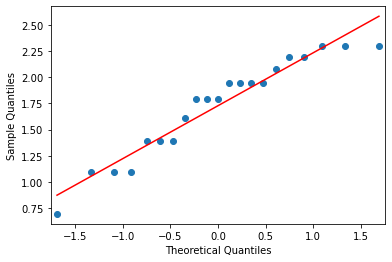

In [300]:
#Log Transformation
df['SortingTime_Log']=np.log(df['SortingTime'])
sm.qqplot(df['SortingTime_Log'], line='r')

## Checking Normality with Square Root Transformation Q-Q plot

In [304]:
#Square Root Transformaation
df['SortingTime_sqrt']=np.sqrt(df.SortingTime)
df.drop(columns=['SortingTime_exponential'])

,DeliveryTime,SortingTime,SortingTime_Log,SortingTime_sqrt
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278
5,15.35,6,1.791759,2.449490
6,19.00,7,1.945910,2.645751
7,9.50,3,1.098612,1.732051
8,17.90,10,2.302585,3.162278
9,18.75,9,2.197225,3.000000


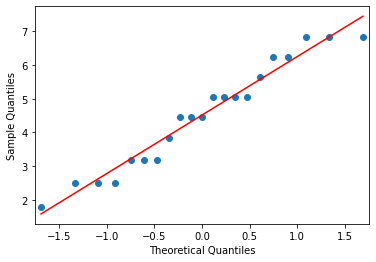

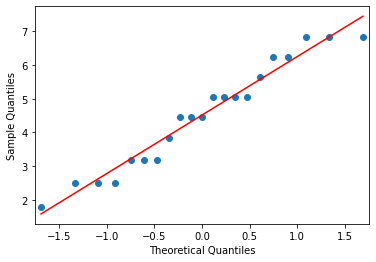

In [239]:
#Q-Q plot Representation of Exponential Transformation data
sm.qqplot(df['SortingTime_exponential'], line='r')

## Splitting Dataset to Train the model

In [278]:
X=df.iloc[ :, 2:3]
y=df.iloc[ :, 0:1]
y=df['DeliveryTime']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,  random_state=42)
print('X_train data is: ','\n',X_train.head(),'\n')
print('y_train data is:','\n',y_train.head())

X_train data is:  
     SortingTime_Log
3          2.197225
18         0.693147
16         1.791759
13         1.098612
2          1.791759 

y_train data is: 
 3     24.00
18     8.00
16    13.75
13    11.50
2     19.75
Name: DeliveryTime, dtype: float64


## Fitting a linear Regression model without Data Transformation

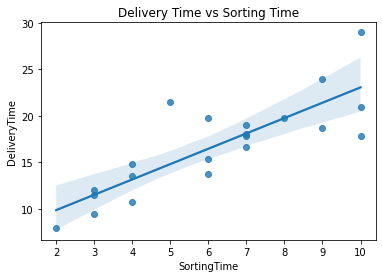

In [279]:
#Fitting a linear Regression Model

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

sns.regplot(x="SortingTime", y="DeliveryTime", data=df).set(title="Delivery Time vs Sorting Time")
plt.show()

In [280]:
model.coef_

array([9.88546614])

In [281]:
model.intercept_

0.42028523776763294

In [282]:
predictions=model.predict(X_test)
predictions

array([23.1824122 , 19.65651412, 14.1244512 , 14.1244512 , 23.1824122 ,
       18.1326628 , 14.1244512 ])

0     2.182412
17    1.546514
15   -0.755549
1     0.624451
8     5.282412
5     2.782663
11    3.374451
Name: DeliveryTime, dtype: float64


<AxesSubplot:xlabel='DeliveryTime'>

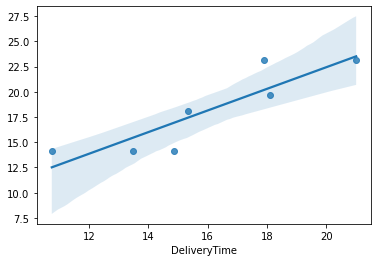

In [283]:
#Residual Regression plot
Residual=predictions-y_test
print(Residual)
sns.regplot(x=y_test,y=predictions)

## Regression Evaluation Metrics

**Here are the three evaluation metrics for regression problems**

**Mean Absolute Error (MAE)**

**Mean Squared Error(MSE)** 

**Root Mean Squared Error(RMSE)**

**RSquare Value(Coefficient of Determination)**

In [284]:
from sklearn import metrics

In [354]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  2.3640646454249015
MSE:  7.878490574948068
RMSE: 2.806864901442189


## Simple Linear Regression Model Score

In [286]:
Rsqaurevalue=model.score(X_train,y_train)
print( '\033[1;3m','Rsquare value or the Accuracy for the linear regression model is:',int(Rsqaurevalue*100),'%','\033[0m')

 Rsquare value or the Accuracy for the linear regression model is: 73 % 


# Fitting a linear Regression model with Log Transformation

In [263]:
X_log=np.log(df['SortingTime']).values.reshape(-1,1)
y_log=np.log(df['DeliveryTime']).values.reshape(-1,1)

In [264]:
X_log_train, X_log_test, y_log_train, y_log_test=train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [265]:
LogModel=LinearRegression()
LogModel.fit(X_log_train, y_log_train)

LinearRegression()

In [307]:
logprediction=LogModel.predict(X_log_test)
logprediction

array([[3.17069599],
       [2.9325148 ],
       [2.55881334],
       [2.55881334],
       [3.17069599]])

In [314]:
#Residual
Residual=logprediction-y_log_test
Residual

array([[ 0.12617355],
       [ 0.03605053],
       [-0.14120469],
       [-0.04387635],
       [ 0.28589527]])

<AxesSubplot:>

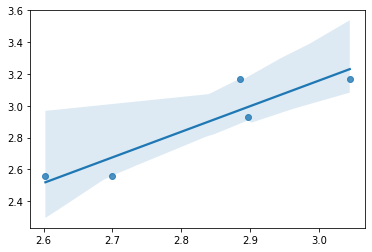

In [315]:
sns.regplot(x=y_log_test, y=logprediction)

## Log Transformation Model Score

In [352]:
accuracy=LogModel.score(X_log_train,y_log_train)
print("Rsqauared Value or the Accuracy of the modeel is:", int(accuracy*100),'%')

Rsqauared Value or the Accuracy of the modeel is: 80 %


In [357]:
print('MAE: ', metrics.mean_absolute_error(y_log_test,logprediction))
print('MSE: ', metrics.mean_squared_error(y_log_test,logprediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_log_test,logprediction)))

MAE:  0.12664007828058726
MSE:  0.024163882173605034
RMSE: 0.15544736142374702


### Fitting a linear Regression model with Square Root  Data Transformation

In [319]:
X_sqrt=np.sqrt(df['SortingTime']).values.reshape(-1,1)
y_sqrt=np.sqrt(df['DeliveryTime']).values.reshape(-1,1)

In [321]:
#split data

X_sqrt_train,X_sqrt_test, y_sqrt_train, y_sqrt_test=train_test_split(X_sqrt,y_sqrt,test_size=0.2, random_state=42)
SqrtModel=LinearRegression()

In [322]:
SqrtModel.fit(X_sqrt_train,y_sqrt_train)

LinearRegression()

## Square Root Transformation data Model Score

In [349]:
SqrtPredictions=SqrtModel.predict(X_sqrt_test)
r=SqrtModel.score(X_sqrt_train,y_sqrt_train)
r
print("Rquared value or the Accuracy of the Square Root Model is:", int(r*100) ,'%\n')

print('MAE:', metrics.mean_absolute_error(y_sqrt_test,SqrtPredictions))
print('MSE:', metrics.mean_squared_error(y_sqrt_test,SqrtPredictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_sqrt_test,SqrtPredictions)))

Rquared value or the Accuracy of the Square Root Model is: 78 %

MAE: 0.30454921921833006
MSE: 0.1457108545227353
RMSE 0.38172091182267615


## Conclusion

 **The best model among the all three models is Logarithmic Transformation Data Model i.e LogModel, we have got minimum error with 80% Accuracy.**

**Rsqauared Value or the Accuracy of the model is: 80 %**

**MAE:  0.12664007828058726**

**MSE:  0.024163882173605034**

**RMSE: 0.15544736142374702**
 